In [4]:
import os
import matplotlib.pyplot as plt
# import seaborn as sns

def get_accuracy_loss_plot(avg_test_accuracies, avg_test_losses, results_dir, optimizer, lr):
   
    if not os.path.exists(results_dir):
        os.makedirs(results_dir)

    plt.figure(figsize=(12, 6))

   
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(avg_test_accuracies) + 1), avg_test_accuracies, marker='o', linestyle='-')
    plt.title(f'Average Test Acc Across All Tasks Per Round with with {optimizer} lr={lr}')
    plt.xlabel('Round')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)


    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(avg_test_losses) + 1), avg_test_losses, marker='o', linestyle='-')
    plt.title(f'Average Test Loss Across All Tasks Per Round with {optimizer} lr={lr}')
    plt.xlabel('Round')
    plt.ylabel('Loss')
    plt.grid(True)

    plt.tight_layout()
    
    
    plt.savefig(os.path.join(results_dir, 'accuracy_loss_plot.png'))
    plt.close() 

In [50]:
import os

required_files = [file_name for file_name in os.listdir('/home/gayam22139/BGD_FL/V_SGD_n_BGD_plots/all_experiments_results') if '0.01' in file_name]

In [51]:
required_files

['0.01_combined.txt',
 'perm_mnist_10_tasks_100_epochs_0.01_mean_eta_bgd_optim_4_beta_06:55_01-07-2024.txt',
 'perm_mnist_10_tasks_100_epochs_0.01_lr_sgd_optim_4_beta_06:56_01-07-2024.txt']

In [74]:
file_1 = required_files[0]


with open(file_1, 'r') as f:
    file_data = f.readlines()

In [75]:
print(file_data)
len(file_data)

['****************************************************************************************************\n', 'Writing results to perm_mnist_10_tasks_100_epochs_0.01_mean_eta_bgd_optim_4_beta_06:55_01-07-2024\n', 'Task-wise accuracies after all rounds are [[0.87], [0.816, 0.881], [0.688, 0.839, 0.885], [0.586, 0.787, 0.83, 0.883], [0.552, 0.701, 0.695, 0.817, 0.878], [0.419, 0.62, 0.592, 0.754, 0.811, 0.88], [0.443, 0.531, 0.49, 0.664, 0.654, 0.764, 0.876], [0.357, 0.42, 0.408, 0.562, 0.627, 0.675, 0.735, 0.878], [0.261, 0.358, 0.37, 0.509, 0.456, 0.537, 0.576, 0.811, 0.874], [0.196, 0.258, 0.338, 0.372, 0.33, 0.543, 0.405, 0.7, 0.784, 0.879]]\n', 'Task-wise losses after all rouds are [[0.465], [0.605, 0.406], [0.981, 0.524, 0.392], [1.238, 0.68, 0.55, 0.384], [1.328, 0.921, 1.058, 0.576, 0.41], [1.949, 1.2, 1.349, 0.732, 0.589, 0.406], [2.03, 1.529, 1.895, 1.015, 1.117, 0.765, 0.41], [2.912, 1.961, 2.564, 1.373, 1.172, 1.038, 0.806, 0.394], [3.597, 2.273, 2.836, 1.543, 1.726, 1.507, 1.33

13

In [70]:
from ast import literal_eval

def extract_taskwise_accuracies(file_data):
    """
    Extracts task-wise accuracies from the file data using literal_eval.
    
    Parameters:
    - file_data (list of str): Lines of text from the file.
    
    Returns:
    - list of list of list: Task-wise accuracies for both SGD and BGD.
      Structure: [SGD_taskwise_accuracies, BGD_taskwise_accuracies]
    """
    sgd_accuracies = []
    bgd_accuracies = []
    
    sgd_pattern = 'Task-wise accuracies after all rounds are '
    bgd_pattern = 'Task-wise accuracies after all rounds are '
    
    sgd_found = False
    bgd_found = False
    
    for i, line in enumerate(file_data):
        print(f"line {i+1} : {line}\n")
        if not sgd_found and sgd_pattern in line:
            acc_string = line.split(sgd_pattern)[1]
            task_accuracies = literal_eval(acc_string)
            print(f'task_accuracies {task_accuracies}\n')
            bgd_accuracies.append(task_accuracies)
            bgd_found = True
        
        elif not bgd_found and bgd_pattern in line:
            acc_string = line.split(bgd_pattern)[1]
            task_accuracies = literal_eval(acc_string)
            sgd_accuracies.append(task_accuracies)
            sgd_found = True
        
        # Break out of the loop if both patterns have been found
        if sgd_found and bgd_found:
            break
    
    return [sgd_accuracies, bgd_accuracies]

In [71]:
extract_taskwise_accuracies(file_data)

line 1 : ****************************************************************************************************


line 2 : Writing results to perm_mnist_10_tasks_100_epochs_0.01_mean_eta_bgd_optim_4_beta_06:55_01-07-2024


line 3 : Task-wise accuracies after all rounds are [[0.87], [0.816, 0.881], [0.688, 0.839, 0.885], [0.586, 0.787, 0.83, 0.883], [0.552, 0.701, 0.695, 0.817, 0.878], [0.419, 0.62, 0.592, 0.754, 0.811, 0.88], [0.443, 0.531, 0.49, 0.664, 0.654, 0.764, 0.876], [0.357, 0.42, 0.408, 0.562, 0.627, 0.675, 0.735, 0.878], [0.261, 0.358, 0.37, 0.509, 0.456, 0.537, 0.576, 0.811, 0.874], [0.196, 0.258, 0.338, 0.372, 0.33, 0.543, 0.405, 0.7, 0.784, 0.879]]


task_accuracies [[0.87], [0.816, 0.881], [0.688, 0.839, 0.885], [0.586, 0.787, 0.83, 0.883], [0.552, 0.701, 0.695, 0.817, 0.878], [0.419, 0.62, 0.592, 0.754, 0.811, 0.88], [0.443, 0.531, 0.49, 0.664, 0.654, 0.764, 0.876], [0.357, 0.42, 0.408, 0.562, 0.627, 0.675, 0.735, 0.878], [0.261, 0.358, 0.37, 0.509, 0.456, 0.537, 0.576, 0.

[[],
 [[[0.87],
   [0.816, 0.881],
   [0.688, 0.839, 0.885],
   [0.586, 0.787, 0.83, 0.883],
   [0.552, 0.701, 0.695, 0.817, 0.878],
   [0.419, 0.62, 0.592, 0.754, 0.811, 0.88],
   [0.443, 0.531, 0.49, 0.664, 0.654, 0.764, 0.876],
   [0.357, 0.42, 0.408, 0.562, 0.627, 0.675, 0.735, 0.878],
   [0.261, 0.358, 0.37, 0.509, 0.456, 0.537, 0.576, 0.811, 0.874],
   [0.196, 0.258, 0.338, 0.372, 0.33, 0.543, 0.405, 0.7, 0.784, 0.879]],
  [[0.963],
   [0.929, 0.971],
   [0.81, 0.951, 0.973],
   [0.572, 0.824, 0.915, 0.973],
   [0.457, 0.616, 0.769, 0.942, 0.975],
   [0.244, 0.395, 0.468, 0.683, 0.933, 0.974],
   [0.14, 0.229, 0.279, 0.478, 0.778, 0.938, 0.975],
   [0.113, 0.121, 0.204, 0.291, 0.373, 0.822, 0.944, 0.977],
   [0.11, 0.123, 0.151, 0.201, 0.185, 0.514, 0.745, 0.94, 0.975],
   [0.099, 0.125, 0.135, 0.154, 0.14, 0.347, 0.569, 0.868, 0.962, 0.976]]]]

+ Getting acc from file

In [47]:
def extract_taskwise_accuracies(file_data):
  
    sgd_pattern = 'Task-wise accuracies sgd_optim after all rounds are '
    bgd_pattern = 'Task-wise accuracies bgd_optim after all rounds are '
    
    sgd_accuracies, bgd_accuracies = None, None
    sgd_found = False
    bgd_found = False
    
    for line in file_data:
        if not sgd_found and sgd_pattern in line:
            acc_string = line.split(sgd_pattern)[1]
            sgd_accuracies = literal_eval(acc_string)
            sgd_found = True
        
        elif not bgd_found and bgd_pattern in line:
            acc_string = line.split(bgd_pattern)[1]
            bgd_accuracies = literal_eval(acc_string)
            bgd_found = True
        
        if sgd_found and bgd_found:
            break
    
    return [sgd_accuracies, bgd_accuracies]

with open('/home/gayam22139/BGD_FL/V_SGD_n_BGD_plots/all_experiments_results/1.0_combined.txt', 'r') as f:
    file_1_data = f.readlines()



In [48]:

len(file_1_data)

13

In [49]:
file_1_data

['****************************************************************************************************\n',
 'Writing results to perm_mnist_10_tasks_100_epochs_1.0_mean_eta_bgd_optim_4_beta_06:56_01-07-2024\n',
 'Task-wise accuracies bgd_optim after all rounds are [[0.962], [0.933, 0.972], [0.875, 0.944, 0.973], [0.715, 0.811, 0.946, 0.971], [0.636, 0.725, 0.887, 0.946, 0.97], [0.515, 0.665, 0.751, 0.908, 0.949, 0.968], [0.414, 0.493, 0.63, 0.821, 0.898, 0.935, 0.969], [0.385, 0.334, 0.548, 0.702, 0.802, 0.845, 0.934, 0.966], [0.315, 0.325, 0.418, 0.55, 0.632, 0.688, 0.873, 0.94, 0.967], [0.318, 0.305, 0.346, 0.506, 0.525, 0.6, 0.775, 0.908, 0.956, 0.966]]\n',
 'Task-wise losses bgd_optim after all rouds are [[0.143], [0.246, 0.114], [0.481, 0.233, 0.124], [1.188, 0.767, 0.228, 0.123], [1.561, 1.22, 0.46, 0.222, 0.128], [2.322, 1.316, 1.177, 0.371, 0.207, 0.15], [3.047, 2.505, 1.912, 0.727, 0.399, 0.278, 0.131], [3.294, 3.692, 2.791, 1.32, 0.755, 0.591, 0.258, 0.142], [3.97, 3.914, 3.46

In [50]:

sgd_accuracies, bgd_accuracies = extract_taskwise_accuracies(file_1_data)
bgd_accuracies


[[0.962],
 [0.933, 0.972],
 [0.875, 0.944, 0.973],
 [0.715, 0.811, 0.946, 0.971],
 [0.636, 0.725, 0.887, 0.946, 0.97],
 [0.515, 0.665, 0.751, 0.908, 0.949, 0.968],
 [0.414, 0.493, 0.63, 0.821, 0.898, 0.935, 0.969],
 [0.385, 0.334, 0.548, 0.702, 0.802, 0.845, 0.934, 0.966],
 [0.315, 0.325, 0.418, 0.55, 0.632, 0.688, 0.873, 0.94, 0.967],
 [0.318, 0.305, 0.346, 0.506, 0.525, 0.6, 0.775, 0.908, 0.956, 0.966]]

In [51]:
sgd_accuracies

[[0.114],
 [0.101, 0.101],
 [0.114, 0.114, 0.114],
 [0.097, 0.097, 0.097, 0.097],
 [0.103, 0.103, 0.103, 0.103, 0.103],
 [0.097, 0.097, 0.097, 0.097, 0.097, 0.097],
 [0.101, 0.101, 0.101, 0.101, 0.101, 0.101, 0.101],
 [0.103, 0.103, 0.103, 0.103, 0.103, 0.103, 0.103, 0.103],
 [0.098, 0.098, 0.098, 0.098, 0.098, 0.098, 0.098, 0.098, 0.098],
 [0.114, 0.114, 0.114, 0.114, 0.114, 0.114, 0.114, 0.114, 0.114, 0.114]]

### Final version working

In [163]:
import re
import os
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt

def read_file(file_path):
    with open(file_path, 'r') as f:
        file_data = f.readlines()
    return file_data

def extract_taskwise_accuracies(file_data):
  
    sgd_pattern = 'Task-wise accuracies sgd_optim after all rounds are '
    bgd_pattern = 'Task-wise accuracies bgd_optim after all rounds are '
    
    sgd_accuracies, bgd_accuracies = None, None

    for line in file_data:
        if sgd_pattern in line:
            acc_string = line.split(sgd_pattern)[1]
            sgd_accuracies = literal_eval(acc_string)

        if bgd_pattern in line:
            acc_string = line.split(bgd_pattern)[1]
            bgd_accuracies = literal_eval(acc_string)

    return [sgd_accuracies, bgd_accuracies]

def plot_average_accuracies(sgd_accuracies, bgd_accuracies, learning_rate):
    plt.figure(figsize=(10, 6))
    tasks = range(0, len(sgd_accuracies))
    
    sgd_means = [np.mean(np.array(task_accs)) for task_accs in sgd_accuracies]
    plt.plot(tasks, sgd_means, marker='o', label='SGD')
    
    bgd_means = [np.mean(np.array(task_accs)) for task_accs in bgd_accuracies]
    plt.plot(tasks, bgd_means, marker='s', label='BGD')
    
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.title(f'Average Accuracies per round for SGD and BGD with lr = {learning_rate}')
    plt.xticks(range(max(len(sgd_accuracies), len(bgd_accuracies))), [f'Round {i+1}' for i in range(max(len(sgd_accuracies), len(bgd_accuracies)))])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_round_wise_accuracies(sgd_accuracies, bgd_accuracies, lr):
    
    plt.figure(figsize=(10, 6))

    for i in range(len(sgd_accuracies)):
        plt.plot(range(i+1), sgd_accuracies[i], marker='o', linestyle='--', label=f'sgd round {i+1}')

    for i in range(len(bgd_accuracies)):
        plt.plot(range(i+1), bgd_accuracies[i], marker='s', label=f'bgd round {i+1}')

    plt.title(f'Task wise Accuracies per round for SGD and BGD with lr = {lr}')
    plt.xlabel('Rounds')
    plt.ylabel('Accuracy')
    plt.xticks(range(max(len(sgd_accuracies), len(bgd_accuracies))), [f'Round {i+1}' for i in range(max(len(sgd_accuracies), len(bgd_accuracies)))])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main(file_path):

    file_data = read_file(file_path)
    file_name_without_extension = os.path.splitext(file_path)[0]

    # Extract the number part
    number_part = file_name_without_extension.split('/')[-1]
    number_part = number_part.split('_')[0]
    
    sgd_accuracies, bgd_accuracies = extract_taskwise_accuracies(file_data)

    print(sgd_accuracies)
    print(bgd_accuracies)

    sgd_accuracies = [[item * 100 for item in sublist] for sublist in sgd_accuracies]
    bgd_accuracies = [[item * 100 for item in sublist] for sublist in bgd_accuracies]


    # plot_average_accuracies(sgd_accuracies, bgd_accuracies, number_part)
    plot_round_wise_accuracies(sgd_accuracies, bgd_accuracies, number_part)


In [164]:
# main('/home/gayam22139/BGD_FL/V_SGD_n_BGD_plots/all_experiments_results/0.1_combined.txt')

In [165]:
import os

required_files = [file_name for file_name in os.listdir('/home/gayam22139/BGD_FL/V_SGD_n_BGD_plots/all_experiments_results') if 'combined' in file_name]

In [166]:
required_files

['0.01_combined.txt', '0.1_combined.txt', '1.0_combined.txt']

[[0.963], [0.929, 0.971], [0.81, 0.951, 0.973], [0.572, 0.824, 0.915, 0.973], [0.457, 0.616, 0.769, 0.942, 0.975], [0.244, 0.395, 0.468, 0.683, 0.933, 0.974], [0.14, 0.229, 0.279, 0.478, 0.778, 0.938, 0.975], [0.113, 0.121, 0.204, 0.291, 0.373, 0.822, 0.944, 0.977], [0.11, 0.123, 0.151, 0.201, 0.185, 0.514, 0.745, 0.94, 0.975], [0.099, 0.125, 0.135, 0.154, 0.14, 0.347, 0.569, 0.868, 0.962, 0.976]]
[[0.87], [0.816, 0.881], [0.688, 0.839, 0.885], [0.586, 0.787, 0.83, 0.883], [0.552, 0.701, 0.695, 0.817, 0.878], [0.419, 0.62, 0.592, 0.754, 0.811, 0.88], [0.443, 0.531, 0.49, 0.664, 0.654, 0.764, 0.876], [0.357, 0.42, 0.408, 0.562, 0.627, 0.675, 0.735, 0.878], [0.261, 0.358, 0.37, 0.509, 0.456, 0.537, 0.576, 0.811, 0.874], [0.196, 0.258, 0.338, 0.372, 0.33, 0.543, 0.405, 0.7, 0.784, 0.879]]


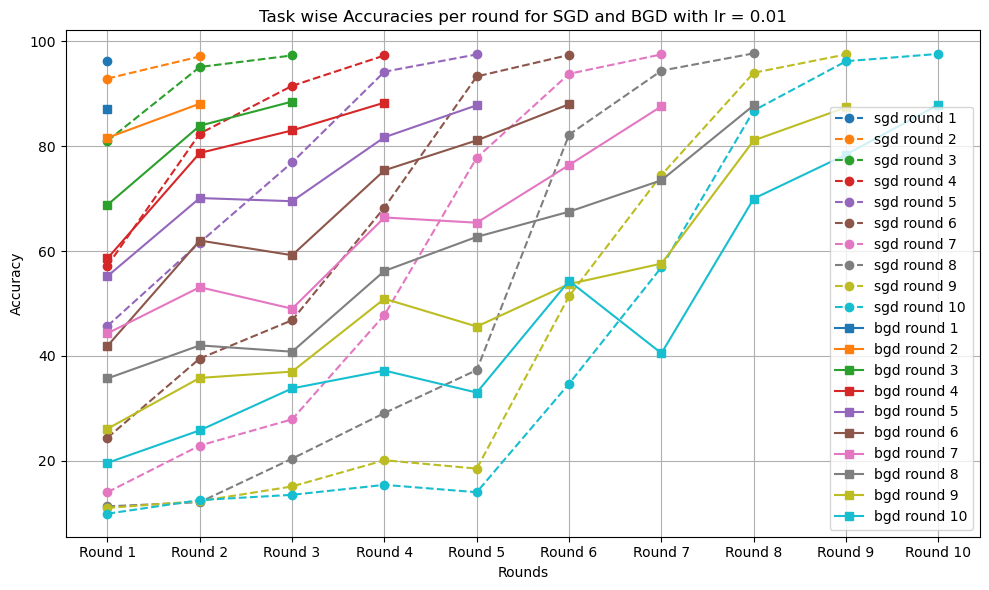

[[0.966], [0.151, 0.975], [0.129, 0.11, 0.975], [0.148, 0.12, 0.128, 0.973], [0.123, 0.133, 0.08, 0.192, 0.975], [0.106, 0.12, 0.101, 0.095, 0.126, 0.973], [0.091, 0.101, 0.086, 0.102, 0.095, 0.145, 0.976], [0.1, 0.074, 0.104, 0.122, 0.087, 0.08, 0.171, 0.974], [0.092, 0.1, 0.076, 0.095, 0.101, 0.113, 0.124, 0.15, 0.972], [0.096, 0.104, 0.075, 0.094, 0.1, 0.127, 0.113, 0.135, 0.275, 0.977]]
[[0.937], [0.875, 0.945], [0.743, 0.894, 0.946], [0.604, 0.792, 0.889, 0.947], [0.466, 0.652, 0.766, 0.912, 0.944], [0.387, 0.544, 0.616, 0.818, 0.897, 0.944], [0.36, 0.396, 0.517, 0.693, 0.789, 0.876, 0.942], [0.312, 0.304, 0.475, 0.593, 0.674, 0.745, 0.856, 0.944], [0.27, 0.284, 0.423, 0.483, 0.525, 0.654, 0.688, 0.906, 0.945], [0.252, 0.238, 0.339, 0.386, 0.368, 0.562, 0.558, 0.865, 0.904, 0.946]]


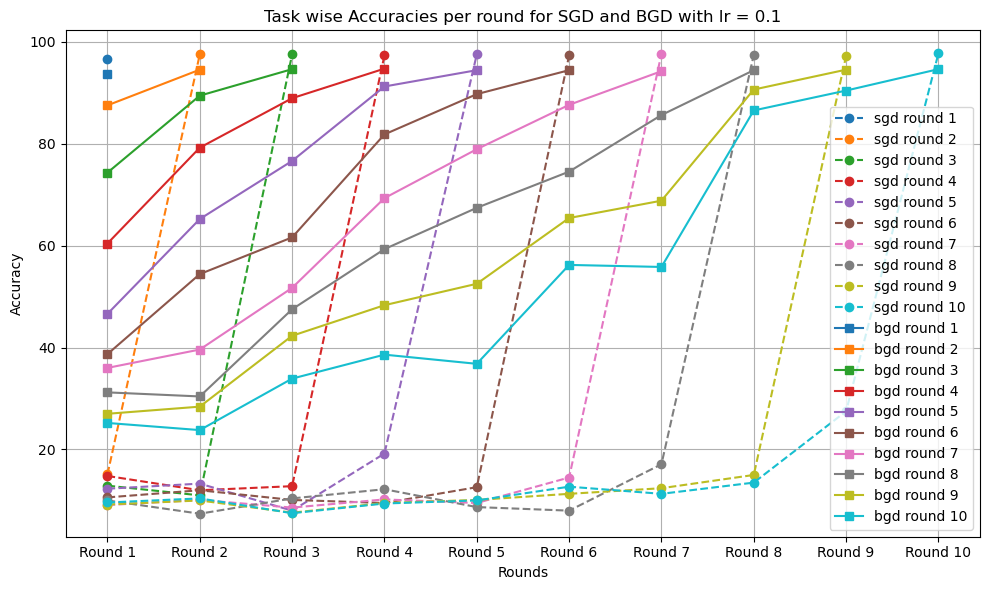

[[0.114], [0.101, 0.101], [0.114, 0.114, 0.114], [0.097, 0.097, 0.097, 0.097], [0.103, 0.103, 0.103, 0.103, 0.103], [0.097, 0.097, 0.097, 0.097, 0.097, 0.097], [0.101, 0.101, 0.101, 0.101, 0.101, 0.101, 0.101], [0.103, 0.103, 0.103, 0.103, 0.103, 0.103, 0.103, 0.103], [0.098, 0.098, 0.098, 0.098, 0.098, 0.098, 0.098, 0.098, 0.098], [0.114, 0.114, 0.114, 0.114, 0.114, 0.114, 0.114, 0.114, 0.114, 0.114]]
[[0.962], [0.933, 0.972], [0.875, 0.944, 0.973], [0.715, 0.811, 0.946, 0.971], [0.636, 0.725, 0.887, 0.946, 0.97], [0.515, 0.665, 0.751, 0.908, 0.949, 0.968], [0.414, 0.493, 0.63, 0.821, 0.898, 0.935, 0.969], [0.385, 0.334, 0.548, 0.702, 0.802, 0.845, 0.934, 0.966], [0.315, 0.325, 0.418, 0.55, 0.632, 0.688, 0.873, 0.94, 0.967], [0.318, 0.305, 0.346, 0.506, 0.525, 0.6, 0.775, 0.908, 0.956, 0.966]]


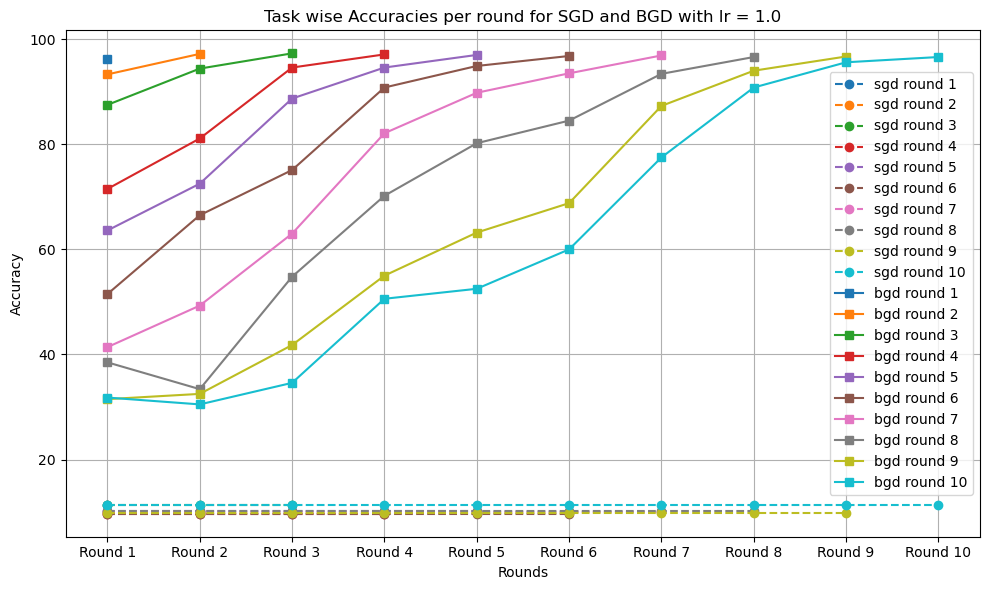

In [167]:
for file_name in required_files:
    main(file_name)

### Plotting task accuracies over rounds

In [28]:
# range(10)

In [39]:
# def plot_task_accuracies_roundwise(sgd_accuracies, bgd_accuracies, lr):
    
#     plt.figure(figsize=(10, 6))

#     for i in range(len(sgd_accuracies)):
#         plt.plot(range(i+1), sgd_accuracies[i], marker='o', linestyle='--', label=f'sgd round {i+1}')

#     for i in range(len(bgd_accuracies)):
#         plt.plot(range(i+1), bgd_accuracies[i], marker='s', label=f'bgd round {i+1}')

#     plt.title(f'Task wise Accuracies per round for SGD and BGD with lr = {lr}')
#     plt.xlabel('Rounds')
#     plt.ylabel('Accuracy')
#     plt.xticks(range(max(len(sgd_accuracies), len(bgd_accuracies))), [f'Round {i+1}' for i in range(max(len(sgd_accuracies), len(bgd_accuracies)))])
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [30]:
# def extract_taskwise_accuracies(file_data):
  
#     sgd_pattern = 'Task-wise accuracies sgd_optim after all rounds are '
#     bgd_pattern = 'Task-wise accuracies bgd_optim after all rounds are '
    
#     sgd_accuracies, bgd_accuracies = None, None

#     for line in file_data:
#         if sgd_pattern in line:
#             acc_string = line.split(sgd_pattern)[1]
#             sgd_accuracies = literal_eval(acc_string)

#         if bgd_pattern in line:
#             acc_string = line.split(bgd_pattern)[1]
#             bgd_accuracies = literal_eval(acc_string)

#     return [sgd_accuracies, bgd_accuracies]

In [31]:
import os

exp_results = {}

files = os.listdir()
files


['plotting.ipynb',
 'perm_mnist_10_tasks_100_epochs_1.0_mean_eta_bgd_optim_4_beta_06:56_01-07-2024.txt',
 '0.01_combined.txt',
 'perm_mnist_10_tasks_100_epochs_1.0_lr_sgd_optim_4_beta_06:57_01-07-2024.txt',
 'combine_files.py',
 'perm_mnist_10_tasks_100_epochs_0.01_mean_eta_bgd_optim_4_beta_06:55_01-07-2024.txt',
 '0.1_combined.txt',
 'perm_mnist_10_tasks_100_epochs_0.1_lr_sgd_optim_4_beta_06:57_01-07-2024.txt',
 'perm_mnist_10_tasks_100_epochs_0.1_mean_eta_bgd_optim_4_beta_06:55_01-07-2024.txt',
 '1.0_combined.txt',
 'perm_mnist_10_tasks_100_epochs_0.01_lr_sgd_optim_4_beta_06:56_01-07-2024.txt']

In [32]:
files[1].split('_')

['perm',
 'mnist',
 '10',
 'tasks',
 '100',
 'epochs',
 '1.0',
 'mean',
 'eta',
 'bgd',
 'optim',
 '4',
 'beta',
 '06:56',
 '01-07-2024.txt']

In [50]:
from ast import literal_eval


def extract_taskwise_accuracies_file_based(file_name):

    with open(file_name) as f:
        file_data = f.readlines()

    pattern = 'Task-wise accuracies after all rounds are '
    accuracies = None

    for line in file_data:
        if pattern in line:
            acc_string = line.split(pattern)[1]
            accuracies = literal_eval(acc_string)

    accuracies = [[item * 100 for item in sublist] for sublist in accuracies]

    return accuracies

In [51]:
for file in files:
    if file.startswith("perm_mnist"):
        learning_rate = float(file.split('_')[6])
        print(learning_rate)
        optimizer = file.split('_')[8]
        if optimizer == 'eta':
            optimizer = file.split('_')[9]
        print(optimizer)
        accuracy_lists = extract_taskwise_accuracies_file_based(file)
        print(accuracy_lists)
        
        if learning_rate not in exp_results:
            exp_results[learning_rate] = {}
        
        exp_results[learning_rate][optimizer] = accuracy_lists

1.0
bgd
[[96.2], [93.30000000000001, 97.2], [87.5, 94.39999999999999, 97.3], [71.5, 81.10000000000001, 94.6, 97.1], [63.6, 72.5, 88.7, 94.6, 97.0], [51.5, 66.5, 75.1, 90.8, 94.89999999999999, 96.8], [41.4, 49.3, 63.0, 82.1, 89.8, 93.5, 96.89999999999999], [38.5, 33.4, 54.800000000000004, 70.19999999999999, 80.2, 84.5, 93.4, 96.6], [31.5, 32.5, 41.8, 55.00000000000001, 63.2, 68.8, 87.3, 94.0, 96.7], [31.8, 30.5, 34.599999999999994, 50.6, 52.5, 60.0, 77.5, 90.8, 95.6, 96.6]]
1.0
sgd
[[11.4], [10.100000000000001, 10.100000000000001], [11.4, 11.4, 11.4], [9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001], [10.299999999999999, 10.299999999999999, 10.299999999999999, 10.299999999999999, 10.299999999999999], [9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001, 9.700000000000001], [10.100000000000001, 10.100000000000001, 10.100000000000001, 10.100000000000001, 10.100000000000001, 10.100000000000001, 10.100000000000001], [10.2

In [52]:
exp_results 

{1.0: {'bgd': [[96.2],
   [93.30000000000001, 97.2],
   [87.5, 94.39999999999999, 97.3],
   [71.5, 81.10000000000001, 94.6, 97.1],
   [63.6, 72.5, 88.7, 94.6, 97.0],
   [51.5, 66.5, 75.1, 90.8, 94.89999999999999, 96.8],
   [41.4, 49.3, 63.0, 82.1, 89.8, 93.5, 96.89999999999999],
   [38.5, 33.4, 54.800000000000004, 70.19999999999999, 80.2, 84.5, 93.4, 96.6],
   [31.5, 32.5, 41.8, 55.00000000000001, 63.2, 68.8, 87.3, 94.0, 96.7],
   [31.8, 30.5, 34.599999999999994, 50.6, 52.5, 60.0, 77.5, 90.8, 95.6, 96.6]],
  'sgd': [[11.4],
   [10.100000000000001, 10.100000000000001],
   [11.4, 11.4, 11.4],
   [9.700000000000001,
    9.700000000000001,
    9.700000000000001,
    9.700000000000001],
   [10.299999999999999,
    10.299999999999999,
    10.299999999999999,
    10.299999999999999,
    10.299999999999999],
   [9.700000000000001,
    9.700000000000001,
    9.700000000000001,
    9.700000000000001,
    9.700000000000001,
    9.700000000000001],
   [10.100000000000001,
    10.100000000000001,
 

In [55]:
import matplotlib.pyplot as plt
import numpy as np

def pad_accuracies(accuracies):
    max_len = max(len(task) for task in accuracies)
    padded_accuracies = [task + [None] * (max_len - len(task)) for task in accuracies]
    return np.array(padded_accuracies, dtype=np.float32)

def plot_task_accuracies_roundwise(sgd_accuracies, bgd_accuracies, lr):
 
    sgd_accuracies = pad_accuracies(sgd_accuracies)
    bgd_accuracies = pad_accuracies(bgd_accuracies)
    
    plt.figure(figsize=(10, 6))

    for i in range(sgd_accuracies.shape[1]):
        print(f'sgd_accuracies : {sgd_accuracies[:, i]}')
        plt.plot(range(1, sgd_accuracies.shape[0] + 1), sgd_accuracies[:, i], marker='o', linestyle='--', label=f'SGD Task {i+1}')
 
    for i in range(bgd_accuracies.shape[1]):
        print(f'bgd_accuracies : {bgd_accuracies[:, i]}')
        plt.plot(range(1, bgd_accuracies.shape[0] + 1), bgd_accuracies[:, i], marker='s', label=f'BGD Task {i+1}')
    
    plt.title(f'Task Accuracies Round-wise for SGD and BGD with lr = {lr}')
    plt.xlabel('Rounds')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



sgd_accuracies : [11.4 10.1 11.4  9.7 10.3  9.7 10.1 10.3  9.8 11.4]
sgd_accuracies : [ nan 10.1 11.4  9.7 10.3  9.7 10.1 10.3  9.8 11.4]
sgd_accuracies : [ nan  nan 11.4  9.7 10.3  9.7 10.1 10.3  9.8 11.4]
sgd_accuracies : [ nan  nan  nan  9.7 10.3  9.7 10.1 10.3  9.8 11.4]
sgd_accuracies : [ nan  nan  nan  nan 10.3  9.7 10.1 10.3  9.8 11.4]
sgd_accuracies : [ nan  nan  nan  nan  nan  9.7 10.1 10.3  9.8 11.4]
sgd_accuracies : [ nan  nan  nan  nan  nan  nan 10.1 10.3  9.8 11.4]
sgd_accuracies : [ nan  nan  nan  nan  nan  nan  nan 10.3  9.8 11.4]
sgd_accuracies : [ nan  nan  nan  nan  nan  nan  nan  nan  9.8 11.4]
sgd_accuracies : [ nan  nan  nan  nan  nan  nan  nan  nan  nan 11.4]
bgd_accuracies : [96.2 93.3 87.5 71.5 63.6 51.5 41.4 38.5 31.5 31.8]
bgd_accuracies : [ nan 97.2 94.4 81.1 72.5 66.5 49.3 33.4 32.5 30.5]
bgd_accuracies : [ nan  nan 97.3 94.6 88.7 75.1 63.  54.8 41.8 34.6]
bgd_accuracies : [ nan  nan  nan 97.1 94.6 90.8 82.1 70.2 55.  50.6]
bgd_accuracies : [ nan  nan  nan  

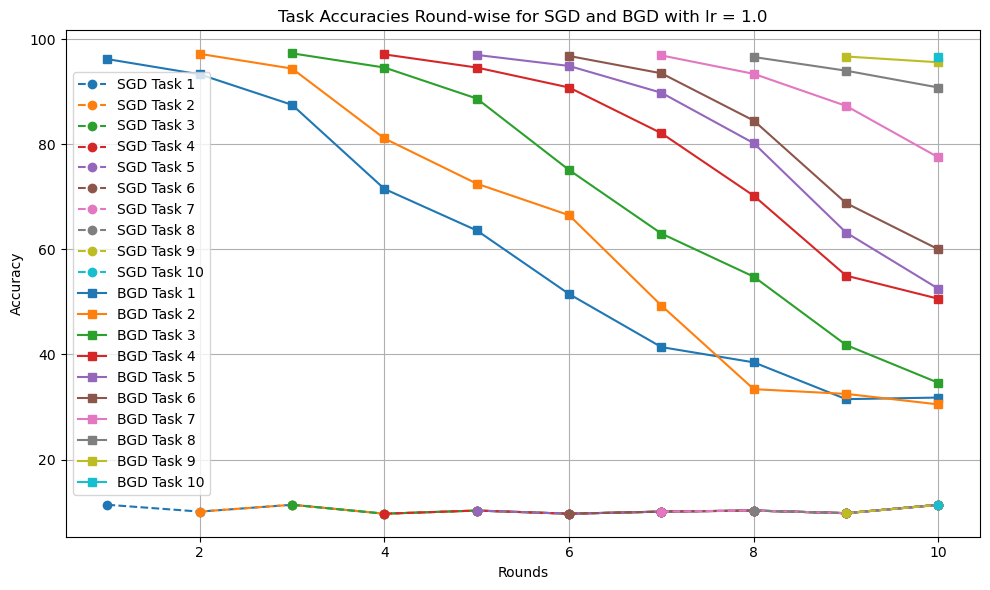

sgd_accuracies : [96.3 92.9 81.  57.2 45.7 24.4 14.  11.3 11.   9.9]
sgd_accuracies : [ nan 97.1 95.1 82.4 61.6 39.5 22.9 12.1 12.3 12.5]
sgd_accuracies : [ nan  nan 97.3 91.5 76.9 46.8 27.9 20.4 15.1 13.5]
sgd_accuracies : [ nan  nan  nan 97.3 94.2 68.3 47.8 29.1 20.1 15.4]
sgd_accuracies : [ nan  nan  nan  nan 97.5 93.3 77.8 37.3 18.5 14. ]
sgd_accuracies : [ nan  nan  nan  nan  nan 97.4 93.8 82.2 51.4 34.7]
sgd_accuracies : [ nan  nan  nan  nan  nan  nan 97.5 94.4 74.5 56.9]
sgd_accuracies : [ nan  nan  nan  nan  nan  nan  nan 97.7 94.  86.8]
sgd_accuracies : [ nan  nan  nan  nan  nan  nan  nan  nan 97.5 96.2]
sgd_accuracies : [ nan  nan  nan  nan  nan  nan  nan  nan  nan 97.6]
bgd_accuracies : [87.  81.6 68.8 58.6 55.2 41.9 44.3 35.7 26.1 19.6]
bgd_accuracies : [ nan 88.1 83.9 78.7 70.1 62.  53.1 42.  35.8 25.8]
bgd_accuracies : [ nan  nan 88.5 83.  69.5 59.2 49.  40.8 37.  33.8]
bgd_accuracies : [ nan  nan  nan 88.3 81.7 75.4 66.4 56.2 50.9 37.2]
bgd_accuracies : [ nan  nan  nan  

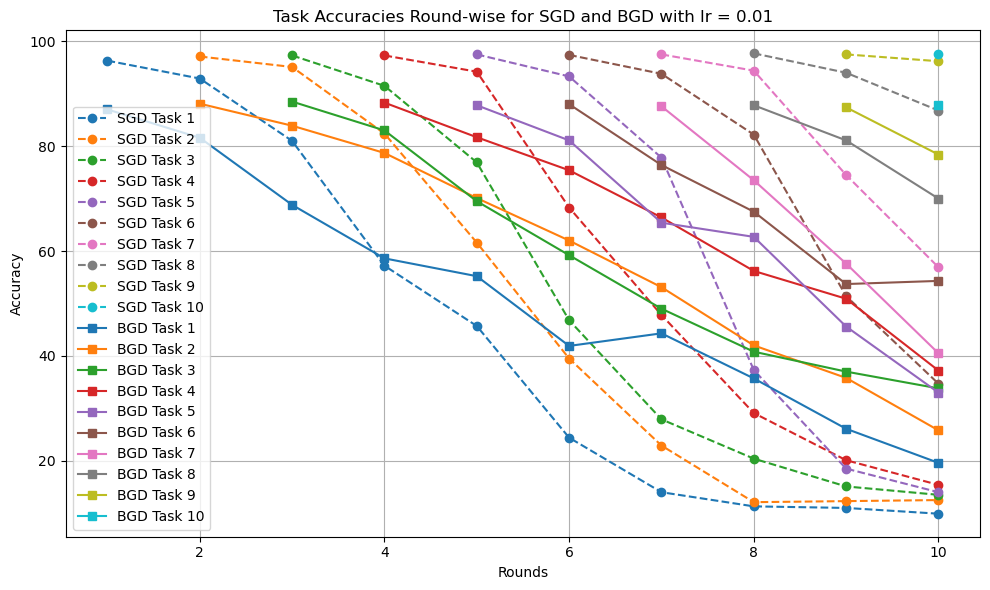

sgd_accuracies : [96.6 15.1 12.9 14.8 12.3 10.6  9.1 10.   9.2  9.6]
sgd_accuracies : [ nan 97.5 11.  12.  13.3 12.  10.1  7.4 10.  10.4]
sgd_accuracies : [ nan  nan 97.5 12.8  8.  10.1  8.6 10.4  7.6  7.5]
sgd_accuracies : [ nan  nan  nan 97.3 19.2  9.5 10.2 12.2  9.5  9.4]
sgd_accuracies : [ nan  nan  nan  nan 97.5 12.6  9.5  8.7 10.1 10. ]
sgd_accuracies : [ nan  nan  nan  nan  nan 97.3 14.5  8.  11.3 12.7]
sgd_accuracies : [ nan  nan  nan  nan  nan  nan 97.6 17.1 12.4 11.3]
sgd_accuracies : [ nan  nan  nan  nan  nan  nan  nan 97.4 15.  13.5]
sgd_accuracies : [ nan  nan  nan  nan  nan  nan  nan  nan 97.2 27.5]
sgd_accuracies : [ nan  nan  nan  nan  nan  nan  nan  nan  nan 97.7]
bgd_accuracies : [93.7 87.5 74.3 60.4 46.6 38.7 36.  31.2 27.  25.2]
bgd_accuracies : [ nan 94.5 89.4 79.2 65.2 54.4 39.6 30.4 28.4 23.8]
bgd_accuracies : [ nan  nan 94.6 88.9 76.6 61.6 51.7 47.5 42.3 33.9]
bgd_accuracies : [ nan  nan  nan 94.7 91.2 81.8 69.3 59.3 48.3 38.6]
bgd_accuracies : [ nan  nan  nan  

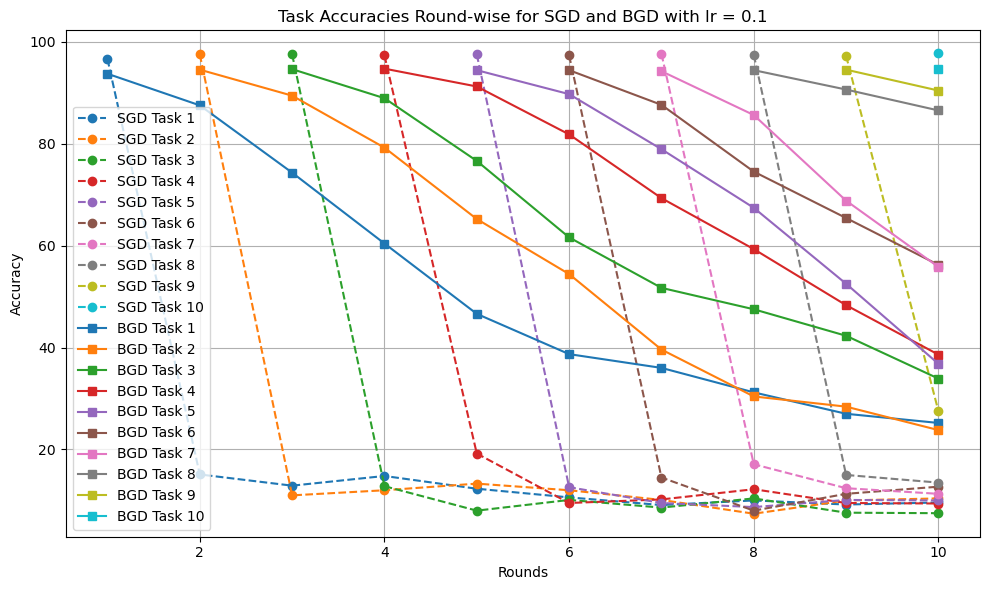

In [56]:
for lr in exp_results:
    plot_task_accuracies_roundwise(exp_results[lr]['sgd'], exp_results[lr]['bgd'], lr)


In [2]:
import sys
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib
# import seaborn as sns


print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"torch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")
print(f"python version: {sys.version}")
print(f"matplotlib version: {matplotlib.__version__}")
# print(f"seaborn version: {sns.version}")


numpy version: 1.22.4
pandas version: 1.2.0
torch version: 1.13.1
torchvision version: 0.14.1
python version: 3.9.19 | packaged by conda-forge | (main, Mar 20 2024, 12:50:21) 
[GCC 12.3.0]
matplotlib version: 3.8.4


numpy version: 1.26.4
pandas version: 2.2.2
torch version: 1.13.1
torchvision version: 0.14.1
python version: 3.9.19 | packaged by conda-forge | (main, Mar 20 2024, 12:50:21) 
[GCC 12.3.0]
matplotlib version: 3.5.0